In [1]:
import pandas as pd
import plotly
from plotly.colors import n_colors
import plotly.graph_objs as go
import plotly.express as px
import numpy as np
from IPython.display import Image

In [2]:
df_fem = pd.read_csv('csv/Vac_Pop_FEM_classeEtaria.csv', sep=';')
df_masc = pd.read_csv('csv/\Vac_Pop_MASC_classeEtaria.csv', sep=';')

In [3]:
df_masc.head()

,CS_SEXO,CLASSE_ETARIA,DOSE_1,DOSE_2,DOSE_REFORCO,POPULACAO
0,M,0 a 4 anos,0,0,0,7016897
1,M,05 a 9 anos,0,0,0,7624144
2,M,10 a 14 anos,0,0,0,8725413
3,M,15 a 19 anos,5563264,2139717,0,8558868
4,M,20 a 24 anos,5609648,2157557,0,8630227


#### GRÁFICO DE PIRÂMIDE ETÁRIA COM DADOS FICTÍCIOS DA VACINAÇÃO POR SEXO (F/M)

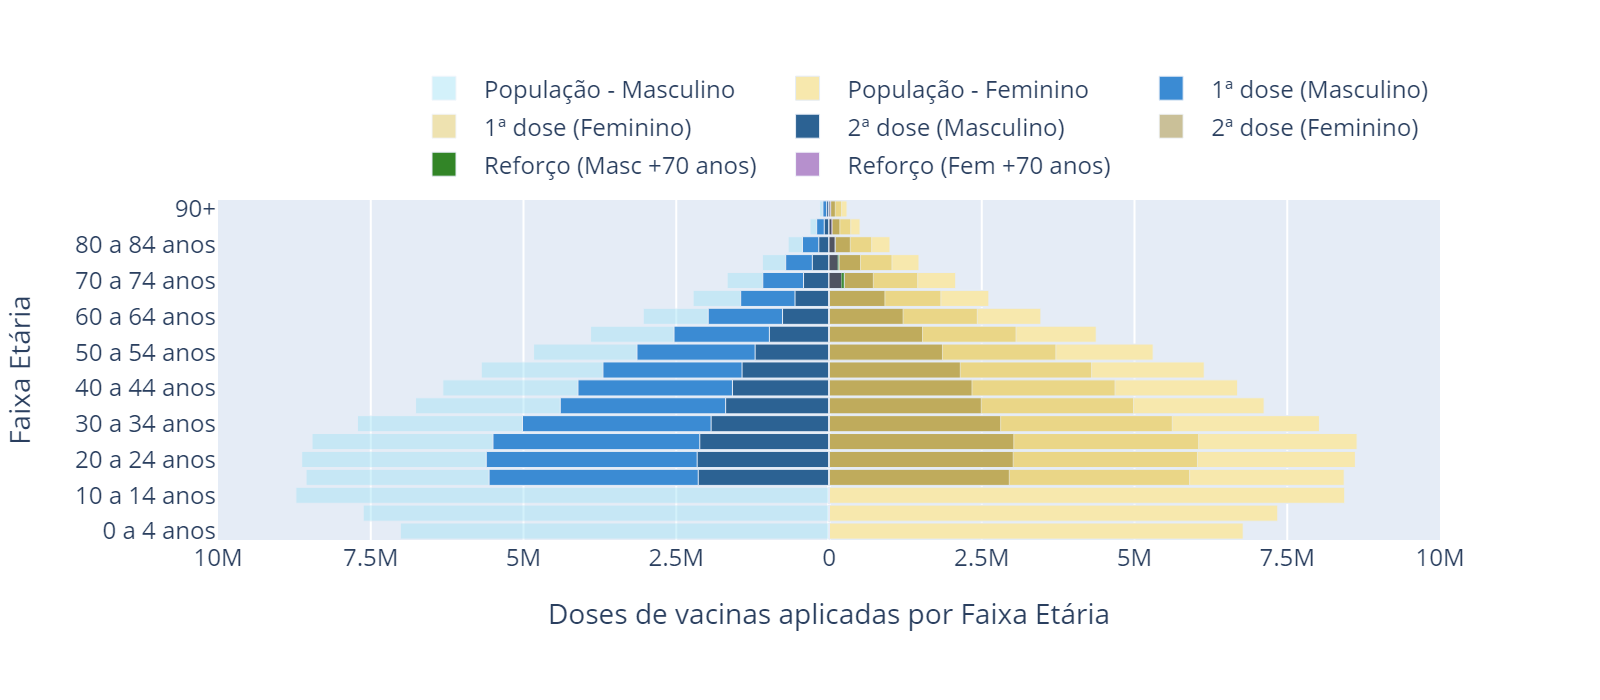

In [4]:
pop_fem = df_fem['POPULACAO']
pop_masc = - df_masc['POPULACAO']
vac_dose1_fem = df_fem['DOSE_1']
vac_dose1_masc = - df_masc['DOSE_1']
vac_dose2_fem = df_fem['DOSE_2']
vac_dose2_masc = - df_masc['DOSE_2']
vac_reforco_fem = df_fem['DOSE_REFORCO']
vac_reforco_masc = df_masc['DOSE_REFORCO']

y = df_fem['CLASSE_ETARIA']

layout = go.Layout(yaxis=go.layout.YAxis(title='Faixa Etária'),
                   xaxis=go.layout.XAxis(range=[-10000000, 10000000],
                   tickvals=[-10000000,- 7500000, -5000000, - 2500000, 0, 2500000, 5000000, 7500000, 10000000],
                   ticktext=['10M', '7.5M','5M','2.5M' ,0, '2.5M','5M','7.5M' ,'10M'],
                   title='Doses de vacinas aplicadas por Faixa Etária'),
                   barmode='overlay',
                   height=500,
                   width=800,
                   bargap=0.1)

data = [go.Bar(y=y,
               x=pop_masc,
               orientation='h',
               name='População - Masculino',
               #text=-1 * pop_masc.astype('int'),               
               hoverinfo='x',
               opacity=0.5,
               marker=dict(color='#a8e3f5')
               ),
        go.Bar(y=y,
               x=pop_fem,
               orientation='h',
               name='População - Feminino',
               #text=1 * pop_fem.astype('int'),
               hoverinfo='x',
               marker=dict(color='#f7e8ad')
               ),
        go.Bar(y=y,
               x=vac_dose1_masc,
               orientation='h',
               name='1ª dose (Masculino)',
               #text=-1 * vac_dose1_masc.astype('int'),
               hoverinfo='x',
               showlegend=True,
               marker=dict(color='#3b8bd3')
               ),
        go.Bar(y=y,
               x=vac_dose1_fem,
               orientation='h',
               name='1ª dose (Feminino)',
               #text=1 * vac_dose1_fem.astype('int'),
               hoverinfo='x',
               showlegend=True,
               opacity=0.5,
               marker=dict(color='#dec562')
               ),
        
        go.Bar(y=y,
               x=vac_dose2_masc,
               orientation='h',
               name='2ª dose (Masculino)',
               #text=-1 * vac_dose2_masc.astype('int'),
               hoverinfo='x',
               showlegend=True,
               marker=dict(color='#2c6293')
               ),
        
        go.Bar(y=y,
               x=vac_dose2_fem,
               orientation='h',
               name='2ª dose (Feminino)',
               #text=1 * vac_dose2_fem.astype('int'),
               hoverinfo='x',
               showlegend=True,
               opacity=0.5,
               marker=dict(color='#958132')
               ),
                go.Bar(y=y,
               x=vac_reforco_masc,
               orientation='h',
               name='Reforço (Masc +70 anos)',
               #text=-1 * vac_dose2_masc.astype('int'),
               hoverinfo='x',
               showlegend=True,
               marker=dict(color='#328527')
               ),
        go.Bar(y=y,
               x=vac_reforco_fem,
               orientation='h',
               name='Reforço (Fem +70 anos)',
               #text=1 * vac_dose2_fem.astype('int'),
               hoverinfo='x',
               showlegend=True,
               opacity=0.5,
               marker=dict(color='#6d219c')
               )
       
       
       ]

fig = go.Figure(data=data, layout=layout)
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

#fig.show()

# Mostrando o gráfico em formato estático. Github não renderiza formato dinâmico da biblioteca Plotly.
img_bytes = fig.to_image(format="png", width=800, height=350, scale=2)
Image(img_bytes)